In [1]:
%cd ..

/Users/bezha/PycharmProjects/TripleStreams


In [2]:
import yaml
import numpy as np
import os
from data import get_flexcontrol_triplestream_dataset

Could not import fluidsynth. AUDIO rendering will not work.
Holoviews not installed. Please install holoviews to be able to generate heatmaps.


In [3]:
# config = yaml.safe_load(open('helpers/configs/FlexControlTripleStreams_0.5.yaml', 'r'))

config = {
    'dataset_root_path': 'data/triple_streams/model_ready/AccentAt0.75/',

    'dataset_files': ['01_candombe_four_voices.pkl.bz2',
                      '02_elbg_both_flattened_left_right.pkl.bz2',
                      '03_groove_midi_crash_hhclosed_hhopen_ride.pkl.bz2',
                      '04_groove_midi_hh_kick_snare_toms.pkl.bz2',
                      '05_groove_midi_hi_lo_mid_ride.pkl.bz2',
                      '06_lmd_bass_brass_drum_percussion.pkl.bz2',
                      '07_lmd_bass_brass_drum_percussive.pkl.bz2',
                      '08_lmd_bass_brass_guitar_percussion.pkl.bz2',
                      '09_lmd_bass_brass_guitar_percussive.pkl.bz2',
                      '10_lmd_bass_brass_guitar_piano.pkl.bz2',
                      '11_lmd_bass_brass_percussion_percussive.pkl.bz2',
                      '12_lmd_bass_brass_percussion_piano.pkl.bz2',
                      '13_lmd_bass_brass_percussive_piano.pkl.bz2',
                      '14_lmd_bass_drum_guitar_percussion.pkl.bz2',
                      '15_lmd_bass_drum_guitar_percussive.pkl.bz2',
                      '16_lmd_bass_drum_percussion_percussive.pkl.bz2',
                      '17_lmd_bass_drum_percussion_piano.pkl.bz2',
                      '18_lmd_bass_drum_percussive_piano.pkl.bz2',
                      '19_lmd_bass_guitar_percussion_percussive.pkl.bz2',
                      '20_lmd_bass_guitar_percussion_piano.pkl.bz2',
                      '21_lmd_bass_guitar_percussive_piano.pkl.bz2',
                      '22_lmd_bass_percussion_percussive_piano.pkl.bz2',
                      '23_lmd_brass_drum_guitar_percussion.pkl.bz2',
                      '24_lmd_brass_drum_guitar_percussive.pkl.bz2',
                      '25_lmd_brass_drum_guitar_piano.pkl.bz2',
                      '26_lmd_brass_drum_percussion_percussive.pkl.bz2',
                      '27_lmd_brass_drum_percussion_piano.pkl.bz2',
                      '28_lmd_brass_drum_percussive_piano.pkl.bz2',
                      '29_lmd_brass_guitar_percussion_percussive.pkl.bz2',
                      '30_lmd_brass_guitar_percussion_piano.pkl.bz2',
                      '31_lmd_brass_guitar_percussive_piano.pkl.bz2',
                      '32_lmd_brass_percussion_percussive_piano.pkl.bz2',
                      '33_lmd_drum_guitar_percussion_percussive.pkl.bz2',
                      '34_lmd_drum_guitar_percussion_piano.pkl.bz2',
                      '35_lmd_drum_guitar_percussive_piano.pkl.bz2',
                      '36_lmd_drum_percussion_percussive_piano.pkl.bz2',
                      '37_lmd_guitar_percussion_percussive_piano.pkl.bz2',
                      '38_ttd_both-is-and_both_flattened_left_right.pkl.bz2',
                      '39_ttd_both-is-or_both_flattened_left_right.pkl.bz2'],

    'max_len': 32,

    'n_encoding_control_tokens':
        [
            None                                # continuos values
        ],
    'encoding_control_keys':
        [
            'Structural Similarity Distance',
        ],

    'n_decoding_control_tokens':
        [
            None,
            None,
            None,
            None,
            None
        ],
    'decoding_control_keys':
        [
            'Total Out Hits',
            'Output Step Density',
            'Stream 1 Relative Density',
            'Stream 2 Relative Density',
            'Stream 3 Relative Density',
        ],
}

In [4]:

is_testing = False

dataset = get_flexcontrol_triplestream_dataset(
        config=config,
        subset_tag="train",
        use_cached=True,
        downsampled_size=2000 if is_testing else None,
        print_logs=False                                #<---  Set to True to print dataset loading logs
    )

In [5]:
structural_similarity_distances = dataset.encoding_controls[:, 0].numpy()

In [6]:
# scatter plot of structural_similarity_distances_values vs structural_similarity_distances_tokens
import matplotlib.pyplot as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://matplotlib_inline.backend_inline version unknown.


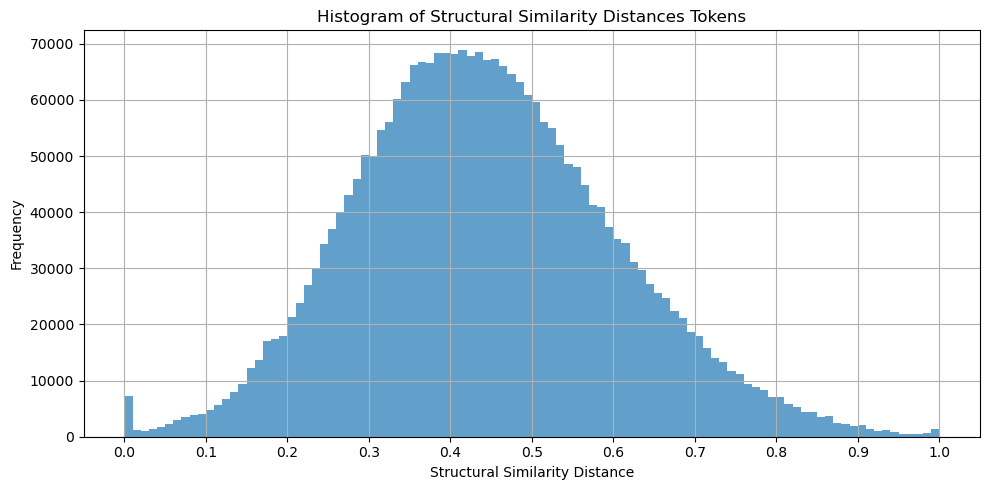

In [7]:
# plot histogram of structural_similarity_distances_tokens
plt.figure(figsize=(10, 5))
plt.hist(structural_similarity_distances, bins=100, alpha=0.7)
plt.title('Histogram of Structural Similarity Distances Tokens')
plt.xlabel('Structural Similarity Distance')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()

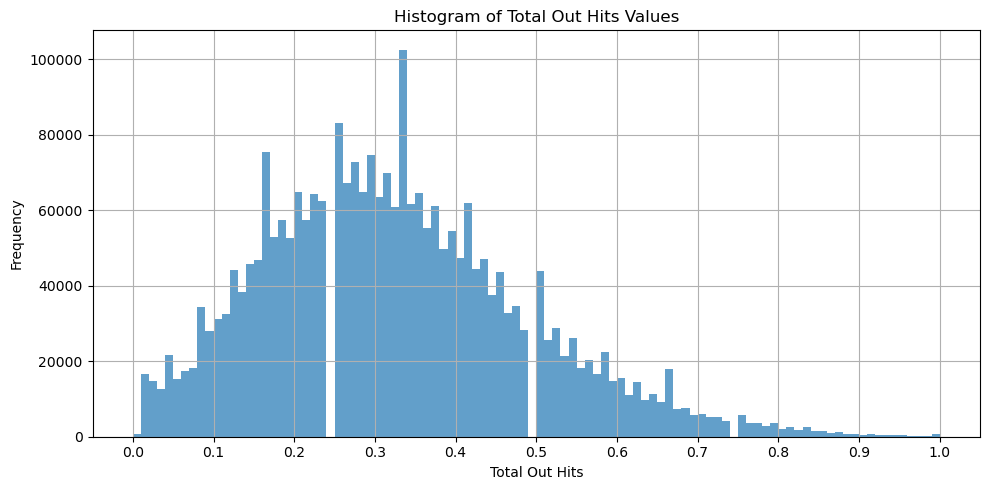

In [8]:
# Total Out Hits
total_out_hits = dataset.decoding_controls[:, 0].numpy()
plt.figure(figsize=(10, 5))
plt.hist(total_out_hits, bins=100, alpha=0.7)
plt.title('Histogram of Total Out Hits Values')
plt.xlabel('Total Out Hits')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()



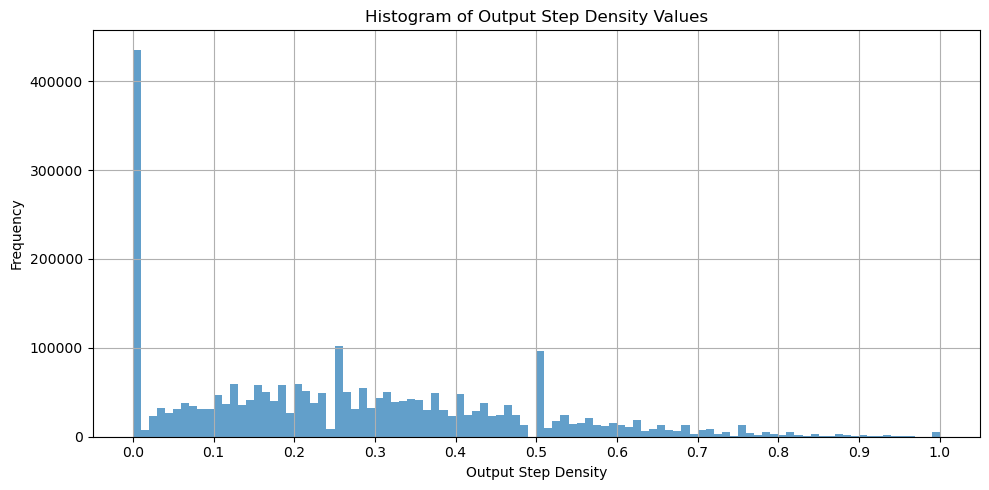

In [9]:
# Output Step Density
output_step_density = dataset.decoding_controls[:, 1].numpy()
plt.figure(figsize=(10, 5))
plt.hist(output_step_density, bins=100, alpha=0.7)
plt.title('Histogram of Output Step Density Values')
plt.xlabel('Output Step Density')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()



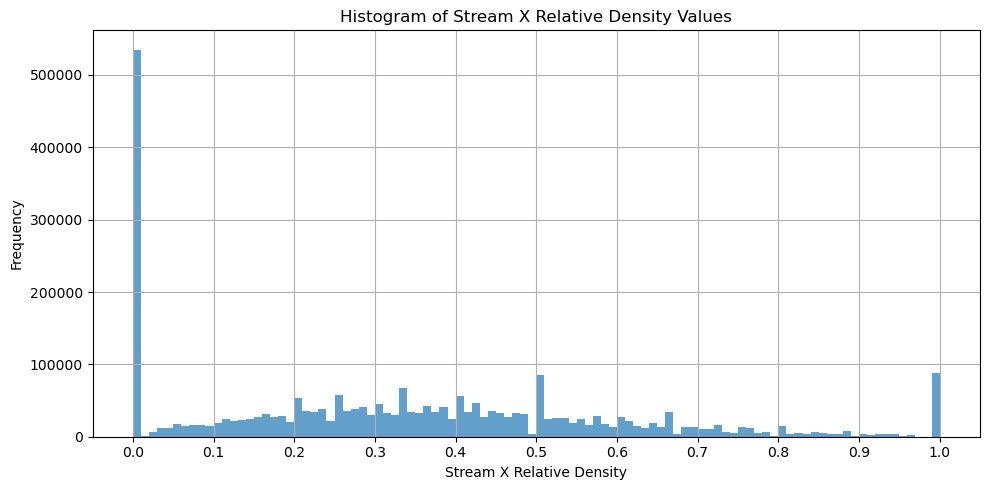

In [10]:
# Stream 3 Relative Histogram
stream_3_relative_density = dataset.decoding_controls[:, 4].numpy()
plt.figure(figsize=(10, 5))
plt.hist(stream_3_relative_density, bins=100, alpha=0.7)
plt.title('Histogram of Stream X Relative Density Values')
plt.xlabel('Stream X Relative Density')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:
#pair decoding control values, and plot histogram of each pair
import tqdm

paired_values = []
for i in tqdm.trange(len(dataset)):
    paired_values.append(
        (
            np.round(dataset.encoding_control_values[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )


100%|██████████| 2699656/2699656 [00:54<00:00, 49505.36it/s]


In [12]:
# get counts of each pair
from collections import Counter
paired_values_counts = Counter(paired_values)
# sort by token values
print("Structural Similarity Distance, Total Out Hits, Stream 1 Relative Density, Stream 2 Relative Density, Stream 3 Relative Density, Output Step Density")
paired_values_counts, len(paired_values_counts)

Structural Similarity Distance, Total Out Hits, Stream 1 Relative Density, Stream 2 Relative Density, Stream 3 Relative Density, Output Step Density


(Counter({(0.18, 0.01, 0.0, 0.0, 1.0, 0.0): 648,
          (0.18, 0.01, 0.0, 0.0, 0.0, 1.0): 648,
          (0.18, 0.01, 0.0, 1.0, 0.0, 0.0): 648,
          (0.0, 0.0, 0.0, 0.0, 0.0, 0.0): 510,
          (0.16, 0.04, 0.0, 1.0, 0.0, 0.0): 370,
          (0.16, 0.04, 0.0, 0.0, 1.0, 0.0): 370,
          (0.16, 0.04, 0.0, 0.0, 0.0, 1.0): 370,
          (0.28, 0.17, 0.0, 1.0, 0.0, 0.0): 346,
          (0.28, 0.17, 0.0, 0.0, 1.0, 0.0): 346,
          (0.28, 0.17, 0.0, 0.0, 0.0, 1.0): 346,
          (0.18, 0.04, 0.0, 1.0, 0.0, 0.0): 322,
          (0.18, 0.04, 0.0, 0.0, 1.0, 0.0): 322,
          (0.18, 0.04, 0.0, 0.0, 0.0, 1.0): 322,
          (0.26, 0.17, 0.0, 0.0, 1.0, 0.0): 320,
          (0.26, 0.17, 0.0, 0.0, 0.0, 1.0): 320,
          (0.26, 0.17, 0.0, 1.0, 0.0, 0.0): 320,
          (0.29, 0.17, 0.0, 0.0, 1.0, 0.0): 320,
          (0.29, 0.17, 0.0, 0.0, 0.0, 1.0): 320,
          (0.29, 0.17, 0.0, 1.0, 0.0, 0.0): 320,
          (0.27, 0.17, 0.0, 0.0, 1.0, 0.0): 318,
          (0.27, 0.17,

In [13]:
# Let's check if Outstep Density changes the number of Relative Density Pairs
#pair decoding control values, and plot histogram of each pair
import tqdm

paired_values_without_step_den = []
paired_values_with_step_den = []

for i in tqdm.trange(len(dataset)):
    paired_values_with_step_den.append(
        (
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )
    paired_values_without_step_den.append(
        (
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )

100%|██████████| 2699656/2699656 [01:03<00:00, 42502.19it/s]


In [14]:
n_pairs_without_step_den = len(Counter(paired_values_without_step_den))
n_pairs_with_step_den = len(Counter(paired_values_with_step_den))
print(n_pairs_without_step_den, n_pairs_with_step_den, n_pairs_with_step_den / n_pairs_without_step_den)


9233 122333 13.249539694573812


In [15]:
# Let's see how much the total out hits changes with the relative densities

paired_values_with_total_out_hits = []

for i in tqdm.trange(len(dataset)):
    paired_values_with_total_out_hits.append(
        (
            np.round(dataset.decoding_controls[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )


100%|██████████| 2699656/2699656 [00:36<00:00, 74219.36it/s]


In [16]:
n_pairs_with_total_out_hits = len(Counter(paired_values_with_total_out_hits))
print(n_pairs_without_step_den, n_pairs_with_total_out_hits, n_pairs_with_total_out_hits / n_pairs_without_step_den)

9233 35333 3.8268168525939563


In [17]:
# all five
paired_values_all = []

for i in tqdm.trange(len(dataset)):
    paired_values_all.append(
        (
            np.round(dataset.decoding_controls[i, 0].item(), 2),
            np.round(dataset.decoding_controls[i, 1].item(), 2),
            np.round(dataset.decoding_controls[i, 2].item(), 2),
            np.round(dataset.decoding_controls[i, 3].item(), 2),
            np.round(dataset.decoding_controls[i, 4].item(), 2),
        )
    )


100%|██████████| 2699656/2699656 [00:45<00:00, 59681.32it/s]


In [18]:
n_pairs_all = len(Counter(paired_values_all))
print(n_pairs_without_step_den, n_pairs_all, n_pairs_all / n_pairs_without_step_den)


9233 187547 20.312682768330987


In [19]:
# Paired scatter plots
from itertools import combinations

feature_map = {
    "Structural Similarity Distance": dataset.encoding_control_values[:, 0].numpy(),
    "Total Out Hits": dataset.decoding_controls[:, 0].numpy(),
    "Output Step Density": dataset.decoding_controls[:, 1].numpy(),
    "Stream 1 Relative Density": dataset.decoding_controls[:, 2].numpy(),
}


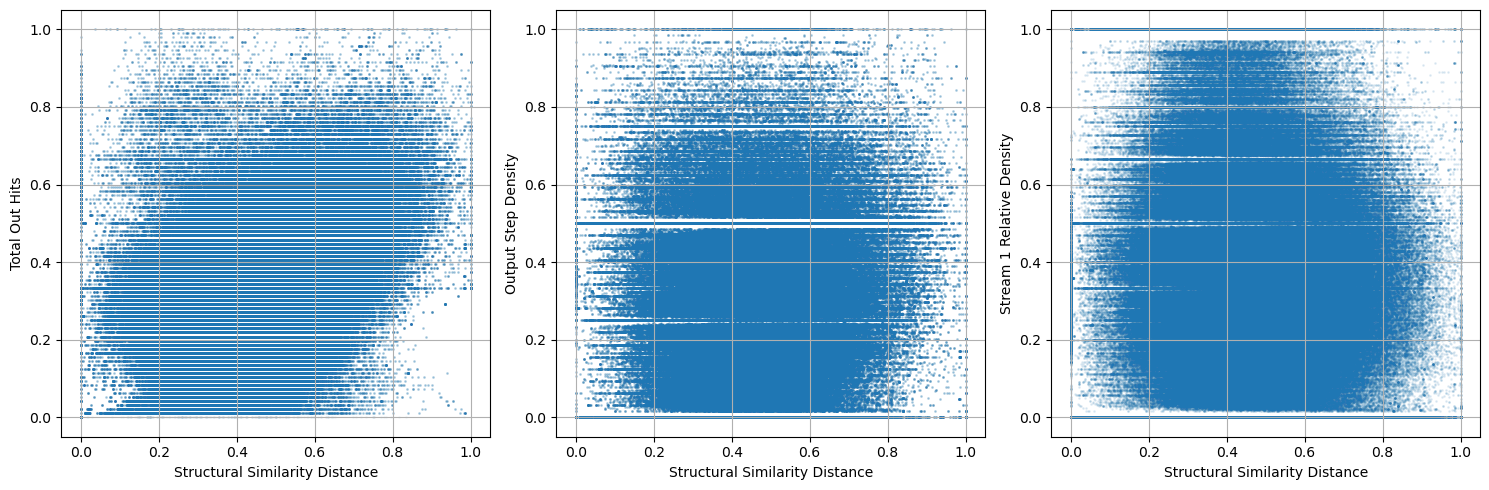

In [20]:
# plot structural similarity distance vs rest

# don't use seaborn, use matplotlib directly
import matplotlib.pyplot as plt

# redo in a 2x3 grid
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, feature2 in enumerate(["Total Out Hits", "Output Step Density", "Stream 1 Relative Density"]):
    feature1_values = feature_map["Structural Similarity Distance"]
    feature2_values = feature_map[feature2]

    ax[i % 3].scatter(feature1_values, feature2_values, alpha=0.05, s=1)
    ax[i % 3].set_xlabel("Structural Similarity Distance")
    ax[i % 3].set_ylabel(feature2)
    ax[i % 3].grid(True)

plt.tight_layout()
plt.show()



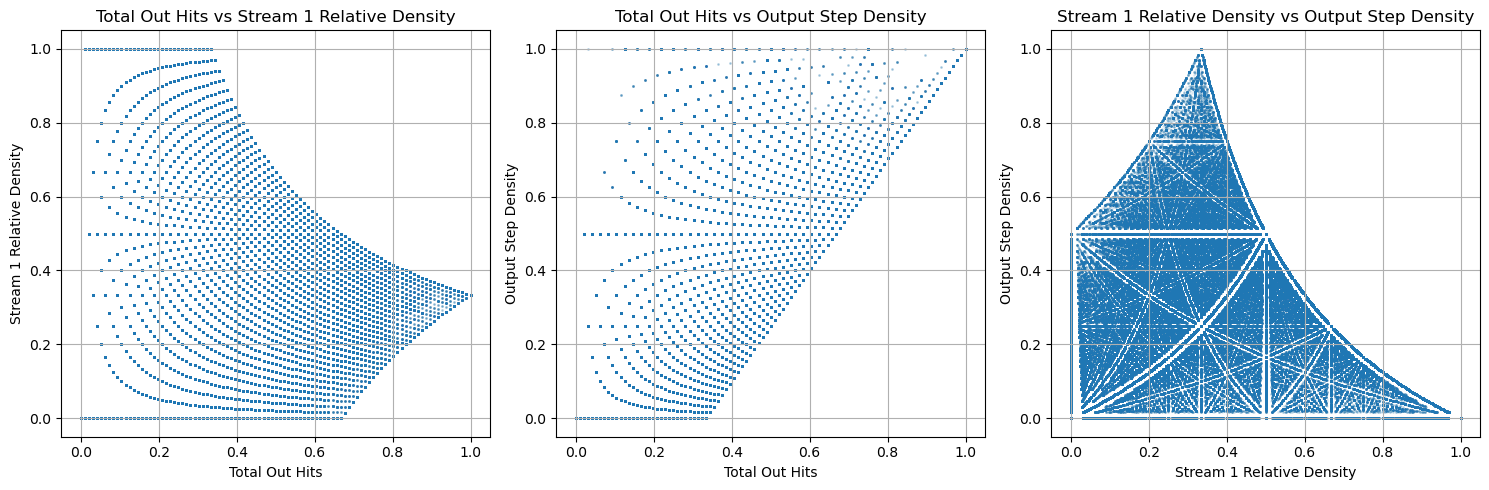

In [21]:
# Paired scatter plots
from itertools import combinations

features_all = [
    'Total Out Hits',
    'Stream 1 Relative Density',
    'Output Step Density']

paired_combinations = list(combinations(features_all, 2))
# don't use seaborn, use matplotlib directly
import matplotlib.pyplot as plt

# redo in a 1x3 grid
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i, (feature1, feature2) in enumerate(paired_combinations):
    feature1_values = feature_map[feature1]
    feature2_values = feature_map[feature2]

    ax[i % 3].scatter(feature1_values, feature2_values, alpha=0.05, s=1)
    ax[i % 3].set_xlabel(feature1)
    ax[i % 3].set_ylabel(feature2)
    ax[i % 3].set_title(f'{feature1} vs {feature2}')
    ax[i % 3].grid(True)


plt.tight_layout()
plt.show()



DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x45c424730>


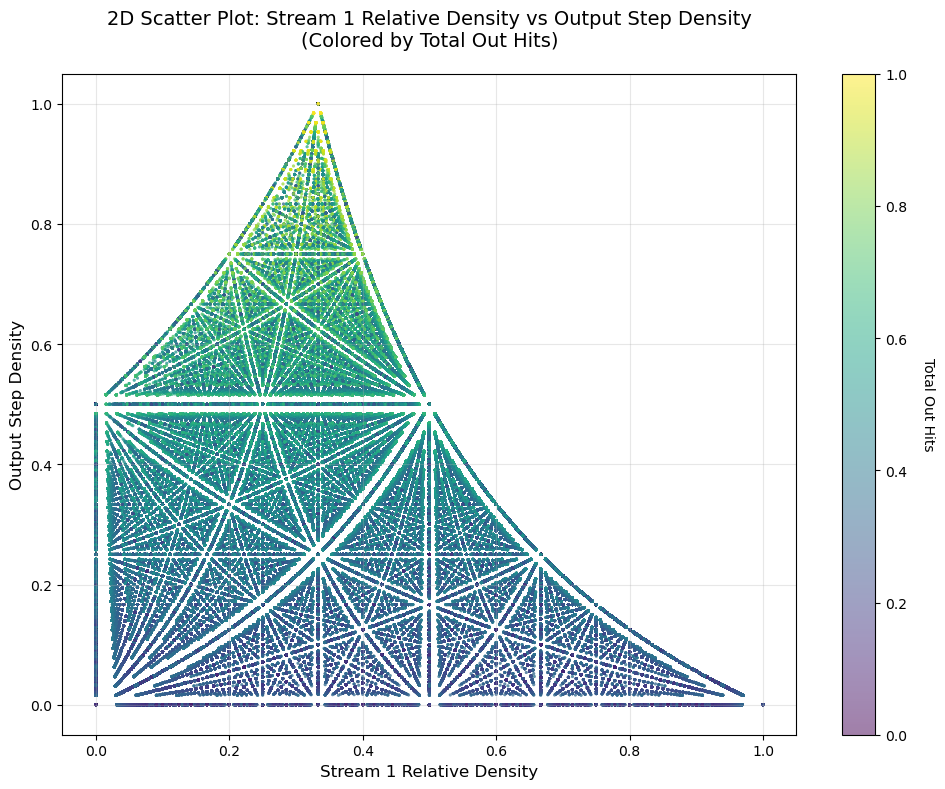

In [29]:
# draw all together but use Total HIts as colour
plt.figure(figsize=(10, 8))

# Create scatter plot with 'Total Out Hits' as color
scatter = plt.scatter(feature_map['Stream 1 Relative Density'],
                     feature_map['Output Step Density'],
                     c=feature_map['Total Out Hits'],  # Color by Total Out Hits
                     cmap='viridis',          # Color scheme
                     alpha=.5,               # Transparency
                     s=5,                    # Point size
                     edgecolors='black',      # Point edges
                     linewidth=0)           # Edge width

# Add colorbar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Total Out Hits', rotation=270, labelpad=20)

# Labels and title
plt.xlabel('Stream 1 Relative Density', fontsize=12)
plt.ylabel('Output Step Density', fontsize=12)
plt.title('2D Scatter Plot: Stream 1 Relative Density vs Output Step Density\n(Colored by Total Out Hits)',
          fontsize=14, pad=20)

# Grid for better readability
plt.grid(True, alpha=0.3)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()


DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x4582183d0>


Creating individual plots with dedicated colorbars...


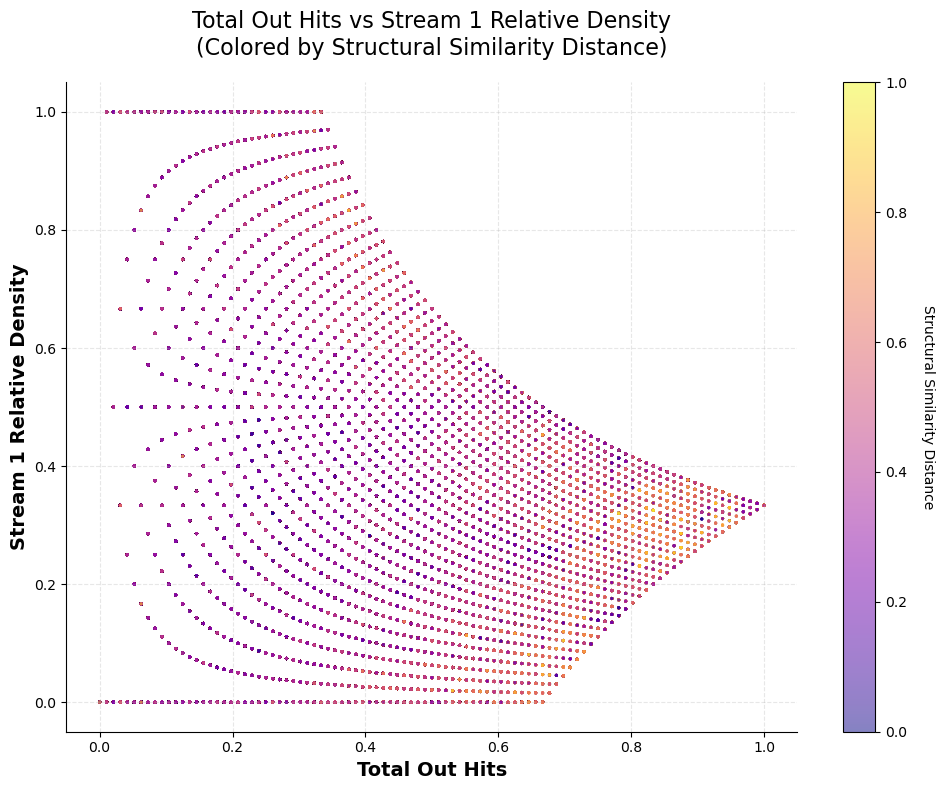

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x31f1410a0>


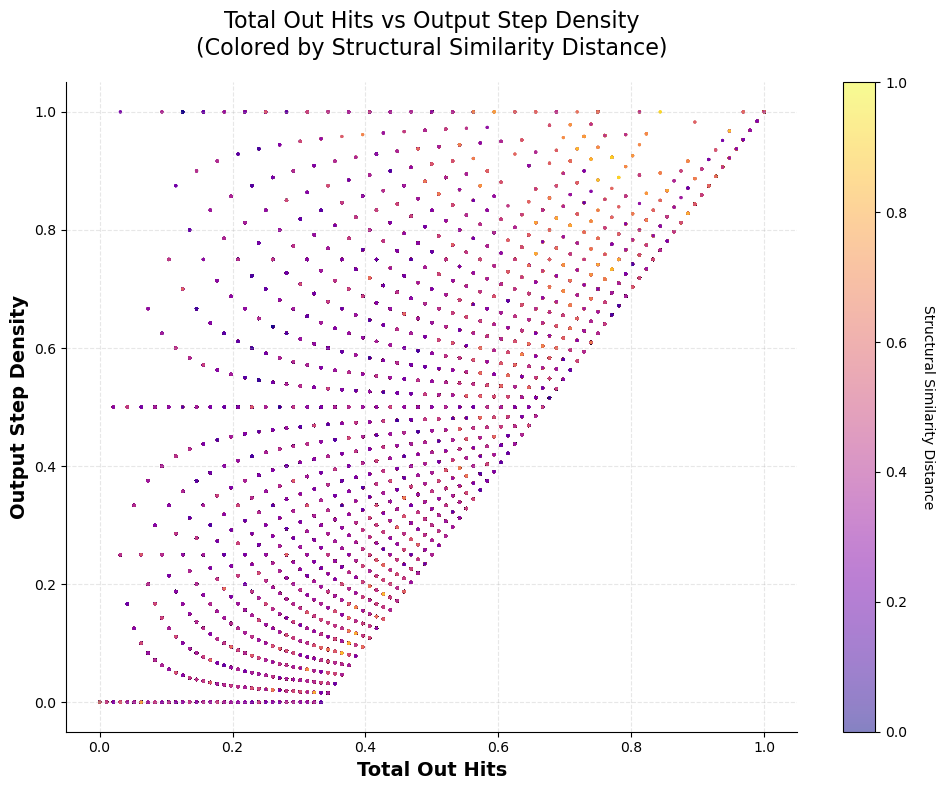

DEBUG:matplotlib.colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x31f20ba00>


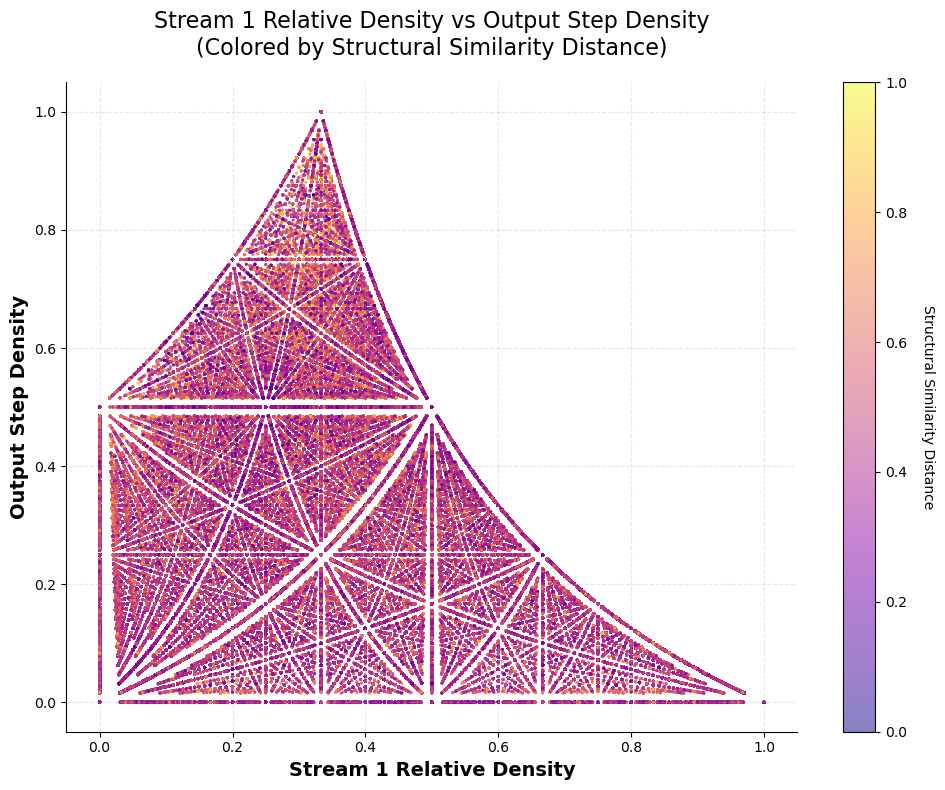

Data overview:
Total data points: 2699656
Structural similarity range: 0.000 to 1.000
Total Out Hits: 0.000 to 1.000
Stream 1 Relative Density: 0.000 to 1.000
Output Step Density: 0.000 to 1.000


In [31]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import combinations

# Create a single plot with all data points colored by structural similarity
features_all = [
    'Total Out Hits',
    'Stream 1 Relative Density',
    'Output Step Density'
]

paired_combinations = list(combinations(features_all, 2))

# Optional: Create individual plots with better colorbar visibility
print("Creating individual plots with dedicated colorbars...")

for i, (feature1, feature2) in enumerate(paired_combinations):
    plt.figure(figsize=(10, 8))

    feature1_values = feature_map[feature1]
    feature2_values = feature_map[feature2]

    scatter = plt.scatter(
        feature1_values,
        feature2_values,
        c=structural_similarity_distances,
        cmap='plasma',           # Different colormap for variety
        alpha=0.5,
        s=5,
        edgecolors='black',
        linewidth=0
    )

    # Add colorbar
    colorbar = plt.colorbar(scatter)
    colorbar.set_label('Structural Similarity Distance', rotation=270, labelpad=20)

    # Labels and styling
    plt.xlabel(feature1, fontsize=14, fontweight='bold')
    plt.ylabel(feature2, fontsize=14, fontweight='bold')
    plt.title(f'{feature1} vs {feature2}\n(Colored by Structural Similarity Distance)',
              fontsize=16, pad=20)

    plt.grid(True, alpha=0.3, linestyle='--')

    # Remove top and right spines for cleaner look
    ax_current = plt.gca()
    ax_current.spines['top'].set_visible(False)
    ax_current.spines['right'].set_visible(False)

    plt.tight_layout()
    plt.show()

print(f"Data overview:")
print(f"Total data points: {len(structural_similarity_distances)}")
print(f"Structural similarity range: {np.min(structural_similarity_distances):.3f} to {np.max(structural_similarity_distances):.3f}")
for feature in features_all:
    values = feature_map[feature]
    print(f"{feature}: {np.min(values):.3f} to {np.max(values):.3f}")

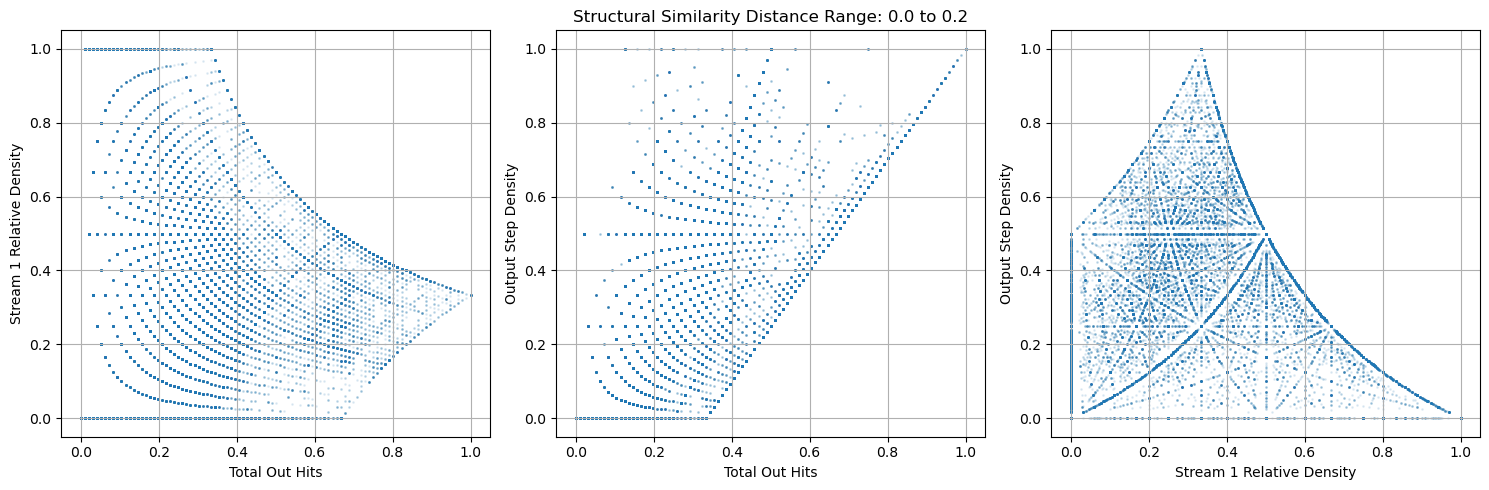

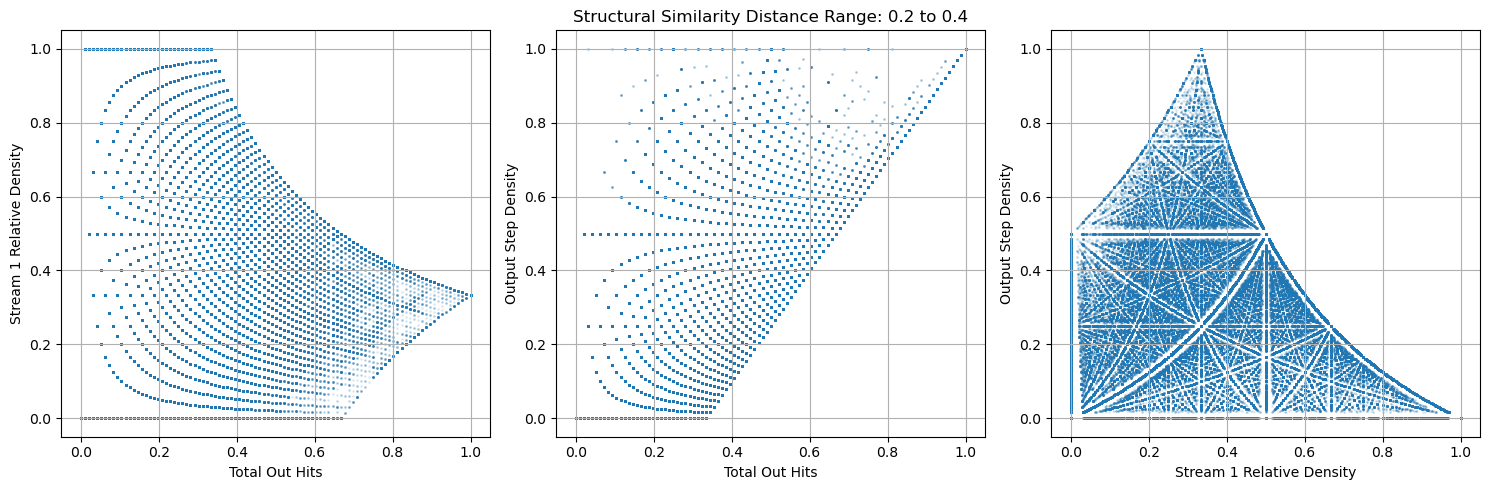

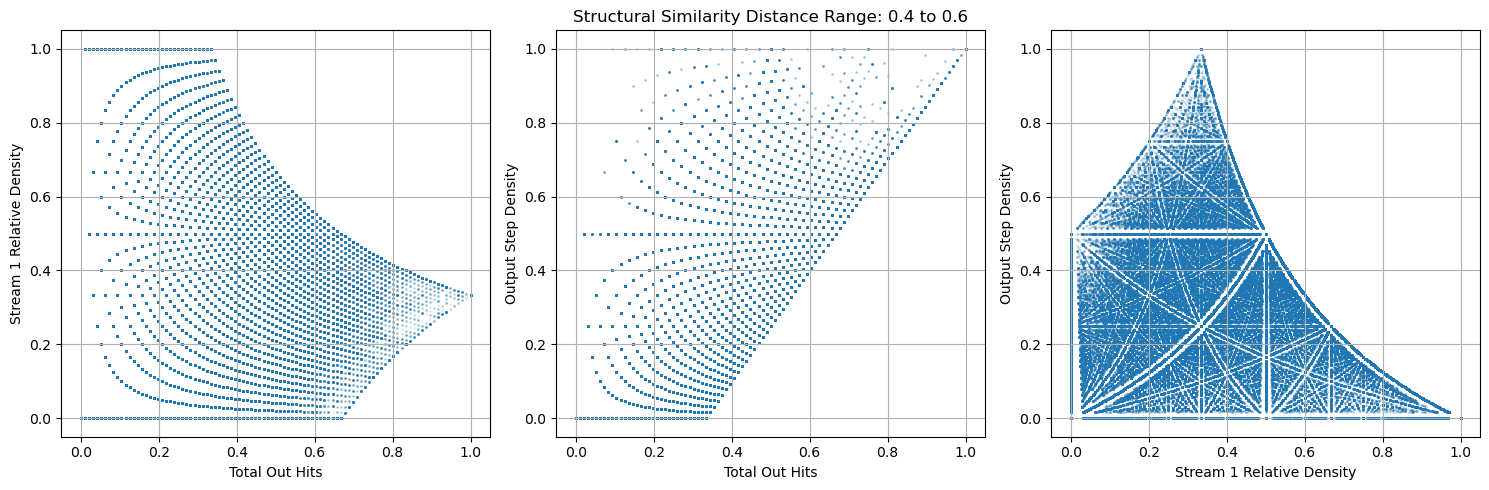

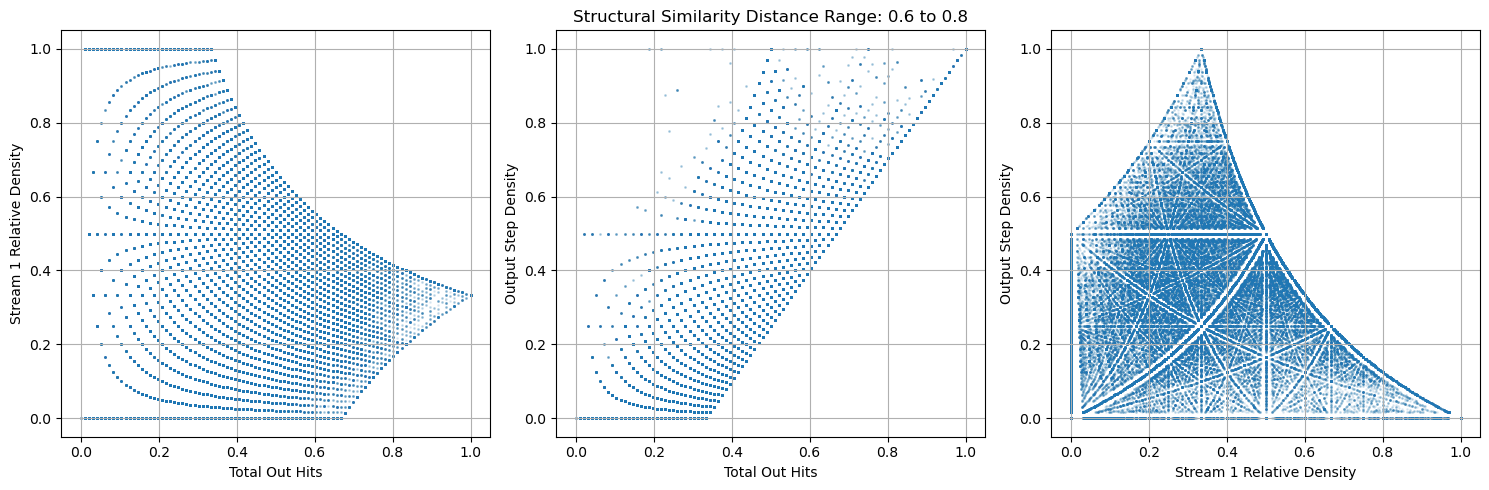

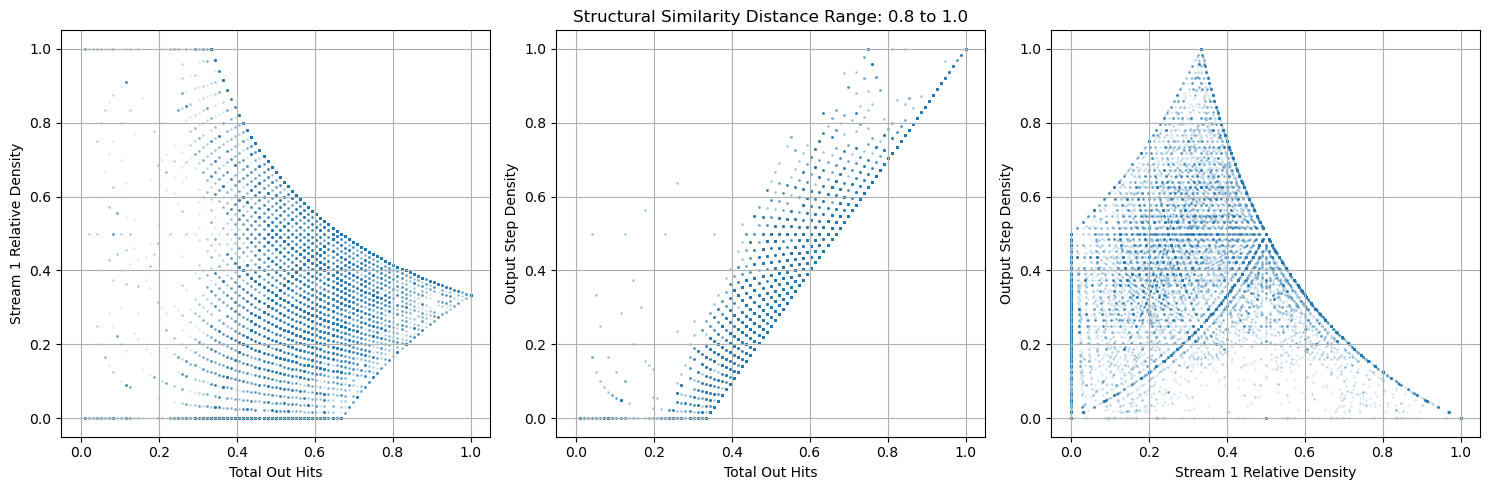

In [32]:
# Let's look at the output plots for specific ranges of input controls

edges = np.arange(0.0, 1.1, 0.2)
structural_similarity_distance_ranges = [edges[i:i+2] for i in range(len(edges)-1)]

for structral_similarity_distance_range in structural_similarity_distance_ranges:
    # filter dataset by structural similarity distance range
    filtered_indices = np.where(
        (structural_similarity_distances >= structral_similarity_distance_range[0]) &
        (structural_similarity_distances <= structral_similarity_distance_range[1])
    )[0]

    features_all = [
        'Total Out Hits',
        'Stream 1 Relative Density',
        'Output Step Density']

    paired_combinations = list(combinations(features_all, 2))
    # don't use seaborn, use matplotlib directly
    import matplotlib.pyplot as plt

    # redo in a 1x3 grid
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    for i, (feature1, feature2) in enumerate(paired_combinations):
        feature1_values = feature_map[feature1][filtered_indices]
        feature2_values = feature_map[feature2][filtered_indices]

        ax[i % 3].scatter(feature1_values, feature2_values, alpha=0.05, s=1)
        ax[i % 3].set_xlabel(feature1)
        ax[i % 3].set_ylabel(feature2)
        ax[i % 3].grid(True)

        if i == 1:
            ax[i % 3].set_title(f'Structural Similarity Distance Range: {np.round(structral_similarity_distance_range[0],1)} to {np.round(structral_similarity_distance_range[1],1)}')



    plt.tight_layout()
    plt.show()
